# Условная оптимизация. Метод штрафных функций

Рассмотрим один из многочисленных вариантов метода штрафных функций. Задача условной оптимизации

$f(x) \to \min$

при ограничениях

$g_1(x) = 0, \dots, g_m(x) = 0, \quad
h_1(x) \le 0, \dots, h_p(x) \le 0$

решается при помощи решения последовательности вспомогательных задач безусловной оптимизации:

$\left(F(x) + c\sum_{i=1}^m g(h_i)^2 + c\sum_{k=1}^p \left[ h(h_k) \right]_+^2\right) \to \min,$

где $с$ некоторая возрастающая последовательность (например, геометрическая прогрессия), $[\alpha]_+ = \max\{0,\,\alpha\}$ Реализуйте данный метод. Для решения задачи безусловной оптимизации воспользуйтесь функциями из библиотеки SciPy.

Проиллюстрируйте работу метода на двумерной и многомерных функциях Розенброка

$f(x_1,x_2,\dots,x_n) = \sum_{i=1}^{n-1} \left(  (1-x_i)^2+ 100 (x_{i+1} - x_i^2 )^2 \right)$

с линейными и квадратичными ограничениями. Для $n=2$ изобразите найденные точки минимума на каждой итерации.

In [4]:
import numpy as npy
from scipy import linalg
import matplotlib.pyplot as mathplib
from scipy.optimize import minimize

Основная идея метода штрафных функций состоит в преобразовании задачи минимизации функции с соответствующими ограничениями, наложенными на x $z = f(x)$, в задачу поиска минимума функции без ограничений. $Z = f(x) + P(x)$

Функция P(x) является штрафной. Необходимо, чтобы при нарушении ограничений она штрафовала Z (Увеличивала ее значение). В этом случае минимум функции Z будет находиться внутри области ограничений. Функция P(x), удовлетворяющая этому условию, может быть не единственной

Сначала я буду работать с функцией Розенброка. Её вид:

$f(x,y) = (1-x)^2+ 100 (y - x^2 )^2$

Программа прекратит работу при достижении неизвестной точности. Отобразить можно так:

$f(x,y) = (1-x)^2+ 100 (y - x^2 )^2 + P(x) < dot$

$dot$ - погрешность после вычисления

Определю ф-ию, коэфф. и ограничения, которые будут нужны в решении

In [14]:
x_t = [0.5, 0.5] #Стартовая точка
j = 1 #Кол-во шагов цикла который будет находить минимум
dot = 0.00001 #При достижении точности в данном параметре останавливает работу программы
u = 1 #Служит для работы метода, уменьшается на каждм шаге
c = 0.5 #Константа, служит для уменьшения предыдущего параметра в c раз

a1 = lambda x:(-x[0] + 2) #Первое ограничение
a2 = lambda x:(-x[1] + 2) #Второе ограничение


rozen = lambda x: ((1-x[0])**2) + 100*(x[1] - x[0]**2)**2 #Функция Розенброка от 2 переменных
fun = lambda x: rozen(x) + u*(a1(x)**2 + a2(x)**2)

# Ограничения

$x > 2$

$y > 2$

Далее программа выведет найденный минимум и максимум

Найденный минимум - [1.00001841 1.00003689]
Итераций работы программы - 19


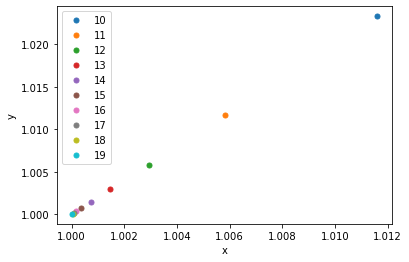

In [15]:
while j < 1000:
    if(j >= 10):
        mathplib.plot(x_t[0], x_t[1], 'o', markersize=5, label=j)
    if u*(max(0, a1(x_t))**2 + max(0, a2(x_t))**2) < dot:
        break
    fun = lambda x: rozen(x) + u*(a1(x)**2 + a2(x)**2)
    x_t = minimize(fun, x_t).x;
    j += 1
    u  *= c;   

print("Найденный минимум - " + str(x_t))
print("Итераций работы программы - " + str(j))

mathplib.xlabel('x')
mathplib.ylabel('y')
mathplib.legend()

pass

## Проверка

Благодаря ф-ии minimize мое решение не должно сильно отличаться в ходе проверки

In [20]:
rozen = lambda x: ((1-x[0])**2) + (100*(x[1] - x[0]**2)**2)

a1 = lambda x: (-x[0] + 2)
a2 = lambda x: (-x[1] + 2)

x = [0.5, 0.5];

constr = ({'type': 'ineq', 'fun': a1},
       {'type': 'ineq', 'fun': a2},) 

minimize(rozen, x, constraints=constr)

     fun: 2.0510953117184906e-08
     jac: array([-0.00338142,  0.00157573])
 message: 'Optimization terminated successfully'
    nfev: 51
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.99988035, 0.99976859])

## Нахождение минимума двумерной ф-ии Розенброка с иными ограничениями

In [31]:

x_t = [5, 20]
j = 1
dot = 0.00003
u = 0.1
c = 1

a1 = lambda x: (x[1]**2 + x[0]**2 - 15) #Ограничение 1
a2 = lambda x: (x[0] + x[1] - 7) #Ограничение 2
a3 = lambda x: (x[1]**2 - 3) #Ограничение 3

rozen = lambda x: ((1-x[0])**2) + (100*(x[1] - x[0]**2)**2)
func = lambda x: rozen(x) + r*(a1(x)**2 + a2(x)**2 + a3(x)**2)

### Ограничения

$y^2 + x^2 > 15$

$x + y = 7$

$y^2 > 3$

Найденный минимум - [1.84458827 3.40431248]
Итераций работы программы - 2


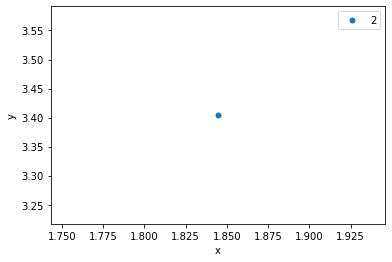

In [33]:
while j < 1000:
    if(j >= 1):
        mathplib.plot(x_t[0], x_t[1], 'o', markersize=5, label=j)
    if u*(max(0, a1(x_t))**2 + max(0, a2(x_t))**2) < dot:
        break
    func = lambda x: rozen(x) + u*(a1(x)**2 + a2(x)**2)
    x_t = minimize(func, x_t).x;
    j += 1
    u  *= c;   

print("Найденный минимум - " + str(x_t))
print("Итераций работы программы - " + str(j))

mathplib.xlabel('x')
mathplib.ylabel('y')
mathplib.legend()

pass

In [34]:
rozen = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2;

a1 = lambda x: (x[1]**2 + x[0]**2 - 15) #Ограничение 1
a2 = lambda x: (x[0] + x[1] - 7) #Ограничение 2
a3 = lambda x: (x[1]**2 - 3) #Ограничение 3

x = [5, 20];

constr = ({'type': 'ineq', 'fun': a1},
       {'type': 'ineq', 'fun': a2},
       {'type': 'ineq', 'fun': a3}) 

minimize(rozen, x, constraints=constr)

     fun: 1.4217624515266867
     jac: array([0.44322076, 0.44274758])
 message: 'Optimization terminated successfully'
    nfev: 94
     nit: 27
    njev: 27
  status: 0
 success: True
       x: array([2.19217129, 4.80782871])

Метод штрафных ф-ий можно использовать для решения задач оптимизации для того, чтобы найти минимальное значение функции.